In [1]:

# import libraries
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
     

In [2]:
inChans=3
outChans=15
stride=1
padding=0
KrnSize=5
c=nn.Conv2d(inChans,outChans,KrnSize,stride,padding)
print(c)
print()
print(f'size of weights: {c.weight.shape}') 

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))

size of weights: torch.Size([15, 3, 5, 5])


In [3]:
print(f'size of bias : {c.bias.shape}')

size of bias : torch.Size([15])


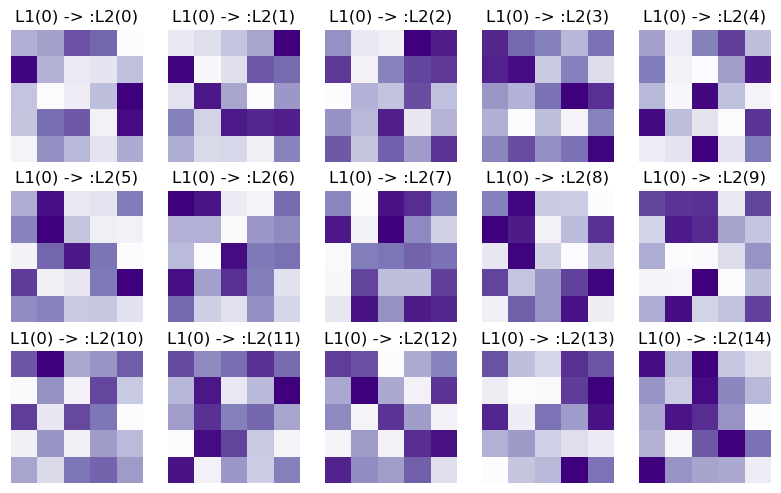

In [4]:
fig,axs=plt.subplots(3,5,figsize=(8,5))
for i,ax in enumerate(axs.flatten()):
  ax.imshow(torch.squeeze(c.weight[i,0,:,:]).detach(),cmap='Purples')
  ax.set_title(f"L1(0) -> :L2({i})")
  ax.axis('off')
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


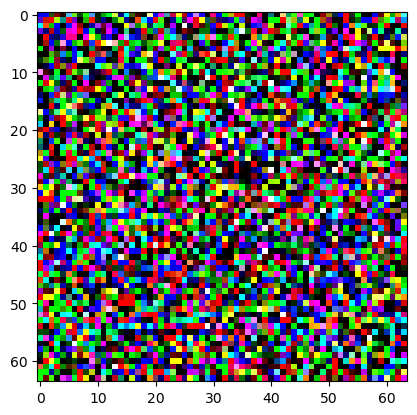

In [9]:
imsize=(1,3,64,64)
img=torch.randn(imsize)
img2view=img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)
plt.imshow(np.squeeze(img2view))




In [10]:
convRes=c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


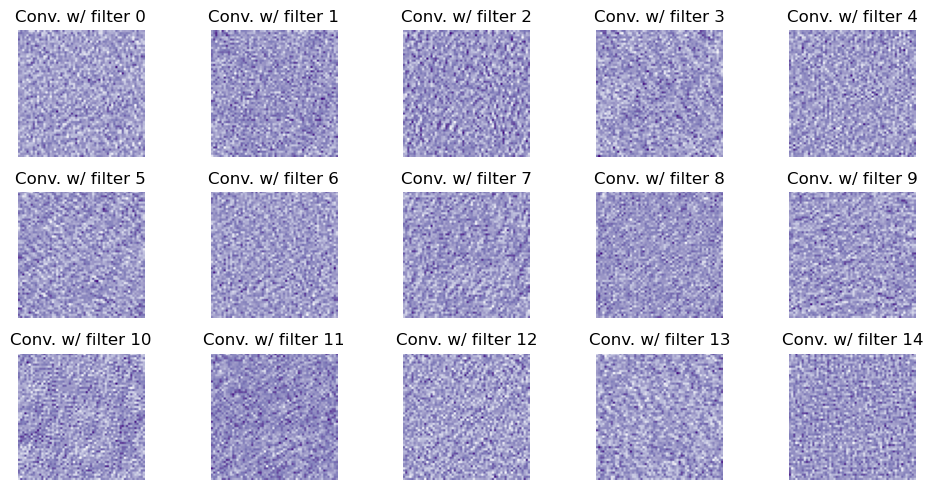

In [11]:

# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig,axs = plt.subplots(3,5,figsize=(10,5))

for i,ax in enumerate(axs.flatten()):

  # extract this "layer" of the convolution result
  I = torch.squeeze(convRes[0,i,:,:]).detach()

  # and visualize it
  ax.imshow(I,cmap='Purples')
  ax.set_title('Conv. w/ filter %s'%i)
  ax.axis('off')

plt.tight_layout()
plt.show()